# 양단고정보 + 집중하중 고정단모멘트 (Fixed-End Moments)

\[
M_A = -\frac{Pab^2}{L^2},\quad
M_B = -\frac{Pa^2b}{L^2},\quad
b = L-a
\]


In [1]:
P = 10.0  # kN
L = 6.0   # m
a = L/2   # 중앙


In [2]:
def fixed_end_moments_point_load(P, L, a):
    b = L - a
    M_A = -P * a * (b**2) / (L**2)
    M_B = -P * (a**2) * b / (L**2)
    return M_A, M_B

M_A, M_B = fixed_end_moments_point_load(P, L, a)
M_A, M_B


(-7.5, -7.5)

In [3]:
theory = -P * L / 8
print(f"M_A = {M_A:.4f} kN·m")
print(f"M_B = {M_B:.4f} kN·m")
print(f"Theory = {theory:.4f} kN·m")


M_A = -7.5000 kN·m
M_B = -7.5000 kN·m
Theory = -7.5000 kN·m


In [4]:
import pandas as pd

rows = []
for a_test in [L*0.2, L*0.3, L*0.4, L*0.5, L*0.6, L*0.7, L*0.8]:
    MA, MB = fixed_end_moments_point_load(P, L, a_test)
    rows.append({
        "a (m)": a_test,
        "a/L": a_test / L,
        "M_A (kN·m)": MA,
        "M_B (kN·m)": MB
    })

df = pd.DataFrame(rows)
df


,a (m),a/L,M_A (kN·m),M_B (kN·m)
0,1.2,0.2,-7.68,-1.92
1,1.8,0.3,-8.82,-3.78
2,2.4,0.4,-8.64,-5.76
3,3.0,0.5,-7.50,-7.50
4,3.6,0.6,-5.76,-8.64
5,4.2,0.7,-3.78,-8.82
6,4.8,0.8,-1.92,-7.68


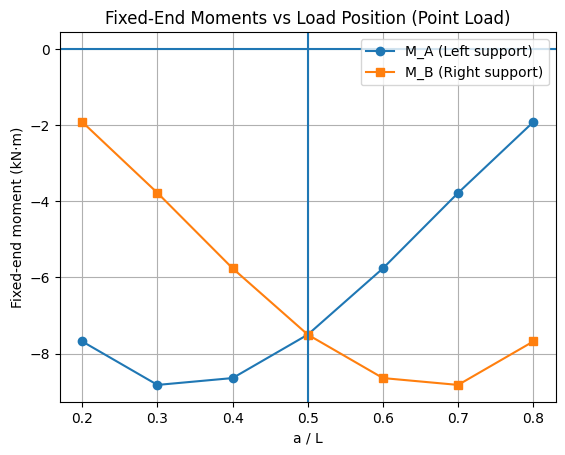

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["a/L"], df["M_A (kN·m)"], marker="o", label="M_A (Left support)")
plt.plot(df["a/L"], df["M_B (kN·m)"], marker="s", label="M_B (Right support)")

plt.axvline(0.5)  # 중앙 위치 표시
plt.axhline(0)    # 모멘트 0 기준선

plt.xlabel("a / L")
plt.ylabel("Fixed-end moment (kN·m)")
plt.title("Fixed-End Moments vs Load Position (Point Load)")
plt.legend()
plt.grid(True)

plt.show()


In [6]:
import sys
!"{sys.executable}" -m pip install openpyxl



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df.to_excel("fixed_end_moment_point_load.xlsx", index=False)
